In [1]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pandas as pd, seaborn.apionly as sns
from corner import corner
%matplotlib inline

/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/Users/bcook/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
sns.set_context('poster')

In [34]:
small_ssp = pd.read_csv('results/dynesty_1_gpu.csv', compression='gzip')
small_ssp.head()

,logz,logdust,logNpix,logage,nlive,niter,ncall,eff,logwt,logzerr,h
0,-271900.0,-2.407,2.387,9.584,200,539,1,26.8,-271900.0,0.1628,5.303
1,-259900.0,-1.933,2.494,9.589,200,539,1,26.8,-259900.0,0.1629,5.308
2,-243400.0,-2.408,2.388,9.508,200,539,1,26.8,-243400.0,0.1630,5.313
3,-211200.0,-2.306,2.363,9.514,200,539,1,26.8,-211200.0,0.1631,5.318
4,-211000.0,-2.321,2.409,9.639,200,539,1,26.8,-211000.0,0.1631,5.323


In [38]:
small_ssp.logwt - small_ssp.logz

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
509    0.0
510    0.0
511    0.0
512    0.0
513    0.0
514    0.0
515    0.0
516    0.0
517    0.0
518    0.0
519    0.0
520    0.0
521    0.0
522    0.0
523    0.0
524    0.0
525    0.0
526    0.0
527    0.0
528    0.0
529    0.0
530    0.0
531    0.0
532    0.0
533    0.0
534    0.0
535    0.0
536    0.0
537    0.0
538    0.0
dtype: float64

In [23]:
neg_loglnlike = np.log10(- small_ssp['lnlike'].values)

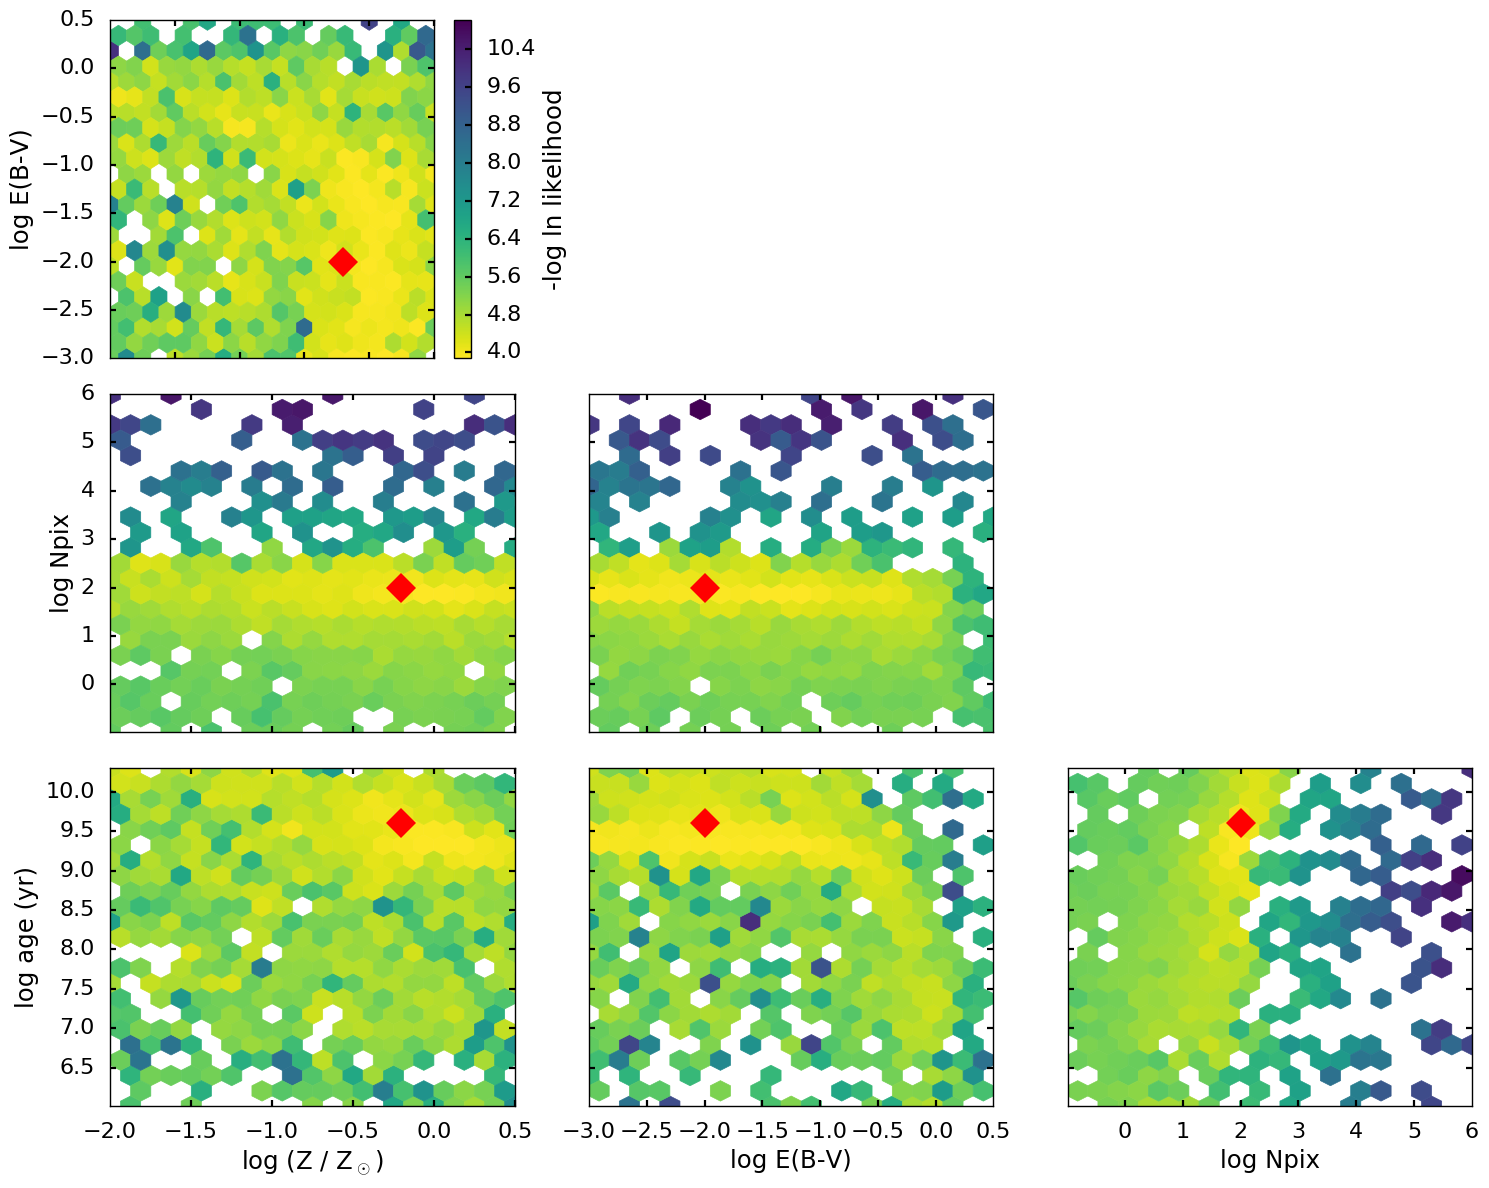

In [24]:
gs = 20
n = mpl.colors.Normalize(vmin=min(neg_loglnlike), vmax=max(neg_loglnlike))
cm = 'viridis_r'
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,12), sharex='col', sharey='row')
plt.subplot(axes[0,0])
plt.hexbin(small_ssp['logz'].values, small_ssp['logdust'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
plt.colorbar(label='-log ln likelihood')
axes[0,0].plot(truth[0], truth[1], 'rD', ms=15)
axes[0,0].set_ylabel('log E(B-V)')
axes[0,1].axis('off')
axes[0,2].axis('off')

axes[1,0].hexbin(small_ssp['logz'].values, small_ssp['logNpix'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
axes[1,0].plot(truth[0], truth[2], 'rD', ms=15)
axes[1,0].set_ylabel('log Npix')
axes[1,1].hexbin(small_ssp['logdust'].values, small_ssp['logNpix'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
axes[1,1].plot(truth[1], truth[2], 'rD', ms=15)
axes[1,2].axis('off')

axes[2,0].hexbin(small_ssp['logz'].values, small_ssp['logage'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
axes[2,0].plot(truth[0], truth[3], 'rD', ms=15)
axes[2,0].set_ylabel('log age (yr)'), axes[2,0].set_xlabel(r'log (Z / Z$_\odot$)')
axes[2,1].hexbin(small_ssp['logdust'].values, small_ssp['logage'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
axes[2,1].set_xlabel('log E(B-V)')
axes[2,1].plot(truth[1], truth[3], 'rD', ms=15)
axes[2,2].hexbin(small_ssp['logNpix'].values, small_ssp['logage'].values, C=neg_loglnlike, gridsize=gs, cmap=cm, norm=n)
axes[2,2].set_xlabel('log Npix')
axes[2,2].plot(truth[2], truth[3], 'rD', ms=15)

plt.tight_layout()
plt.savefig('figures/Nestle_hexbin.pdf')

In [25]:
truth = np.array([-0.2, -2., 2., 9.6])

In [26]:
results_small_ssp = small_ssp[['logz', 'logdust', 'logNpix', 'logage']]

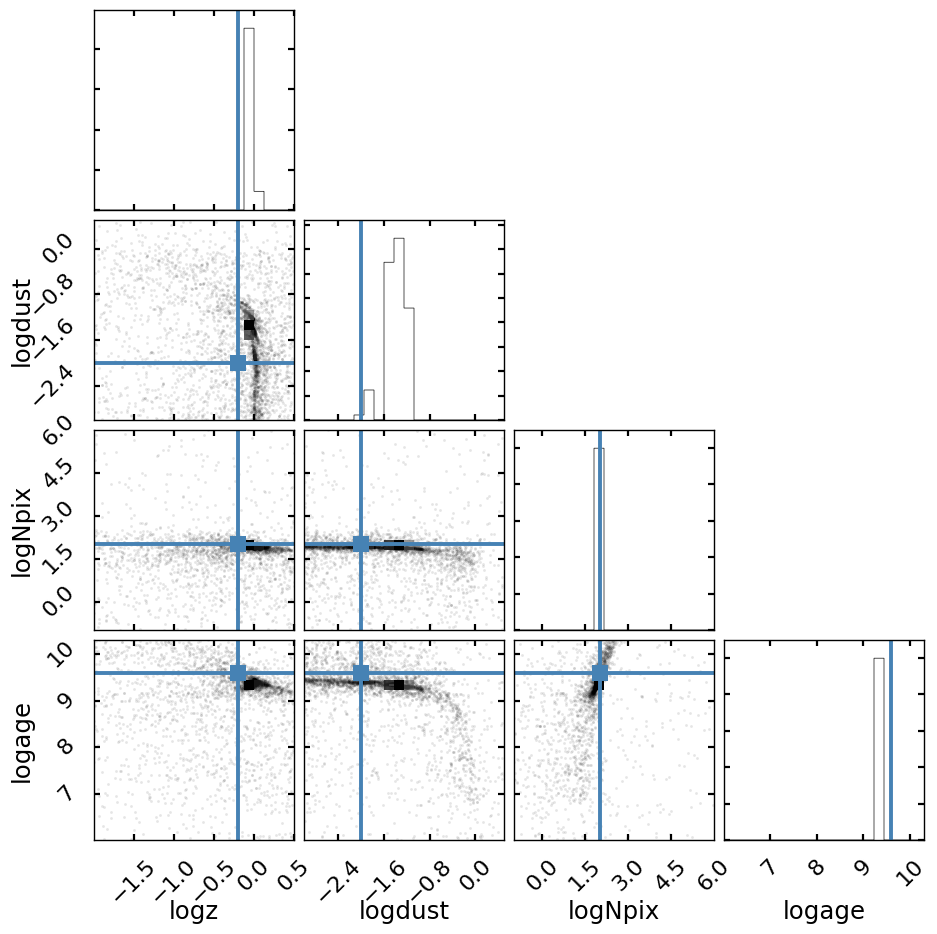

In [31]:
a = corner(results_small_ssp, weights=small_ssp['weights'], truths=truth, bins=20, plot_contours=False, lw=0.5);
plt.savefig('figures/Nestle_corner.pdf')

In [9]:
ssp = pd.read_csv('results/nestle_SSP.csv', compression='gzip')
ssp.head()

,logz,logdust,logNpix,logage,lnlike,weights,logvol,niter,log_evidence,error_log_evidence,information
0,-0.0501,-2.0459,0.9352,9.4481,-inf,0.0,-5.3008,4495,-7494.3999,NaN,NaN
1,-0.7423,-2.9518,4.4098,9.7954,-inf,0.0,-5.3058,4495,-7494.3999,NaN,NaN
2,-1.1950,-2.6987,5.6452,10.0561,-inf,0.0,-5.3108,4495,-7494.3999,NaN,NaN
3,-0.4455,-2.1773,2.3286,7.2312,-inf,0.0,-5.3158,4495,-7494.3999,NaN,NaN
4,-0.1095,-2.2922,3.3150,7.8541,-inf,0.0,-5.3208,4495,-7494.3999,NaN,NaN


In [33]:
print('test \n hello \n hello')

test 
 hello 
 hello


In [13]:
np.isinf(ssp.lnlike).sum()

80

In [15]:
small_full = pd.read_csv('results/nestle_FULL_small.csv', compression='gzip')
small_full.head()

,logz,logdust,logSFH0,logSFH1,logSFH2,logSFH3,logSFH4,logSFH5,logSFH6,lnlike,weights,logvol,niter,log_evidence,error_log_evidence,information
0,-0.0620,-2.1422,-1.2490,-0.0665,0.3477,0.5053,1.1962,1.6381,0.0,-inf,0.0,-5.3008,3651,-18947.0785,NaN,NaN
1,-0.1304,-2.2304,-1.5620,-0.6077,-0.1806,0.1358,1.2758,2.0902,0.0,-inf,0.0,-5.3058,3651,-18947.0785,NaN,NaN
2,-0.1262,-2.4136,-1.4541,0.2138,0.4513,0.2945,1.2839,1.3867,0.0,-inf,0.0,-5.3108,3651,-18947.0785,NaN,NaN
3,-0.4913,-2.0727,-1.0600,-0.2382,0.4566,0.5297,0.9291,1.8788,0.0,-inf,0.0,-5.3158,3651,-18947.0785,NaN,NaN
4,-0.0389,-2.2939,-0.9912,0.0637,0.1964,0.7657,0.7573,1.6086,0.0,-inf,0.0,-5.3208,3651,-18947.0785,NaN,NaN


In [16]:
np.isinf(small_full.lnlike).sum()

177

In [17]:
small_full.logSFH6

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
5       0.0
6       0.0
7       0.0
8       0.0
9       0.0
10      0.0
11      0.0
12      0.0
13      0.0
14      0.0
15      0.0
16      0.0
17      0.0
18      0.0
19      0.0
20      0.0
21      0.0
22      0.0
23      0.0
24      0.0
25      0.0
26      0.0
27      0.0
28      0.0
29      0.0
       ... 
3821    0.0
3822    0.0
3823    0.0
3824    0.0
3825    0.0
3826    0.0
3827    0.0
3828    0.0
3829    0.0
3830    0.0
3831    0.0
3832    0.0
3833    0.0
3834    0.0
3835    0.0
3836    0.0
3837    0.0
3838    0.0
3839    0.0
3840    0.0
3841    0.0
3842    0.0
3843    0.0
3844    0.0
3845    0.0
3846    0.0
3847    0.0
3848    0.0
3849    0.0
3850    0.0
Name: logSFH6, dtype: float64